# **Training Traffic Sign Detection**

Questo progetto si pone l’obiettivo di sviluppare un sistema intelligente capace di **rilevare e riconoscere in tempo reale i principali segnali stradali**, fondamentali per la sicurezza e la corretta interpretazione delle regole della strada. L’addestramento del modello è stato condotto su un dataset ibrido, costruito combinando fonti diverse per garantire varietà, robustezza e rappresentatività del mondo reale. Le classi di interesse selezionate coprono i segnali più critici e frequenti: il **Limite di Velocità** (con riconoscimento del valore numerico), il **Divieto di Sosta**, il celebre cartello di **Stop**, il **Dare la Precedenza**, le **Curve a Sinistra e a Destra**, l’**Attraversamento Pedonale** e il **Divieto di Sorpasso**.

## **Installazione librerie necessarie**

Prima di avviare il training o l’inferenza, assicurati che la directory di lavoro contenga i seguenti file e cartelle, tutti disponibili nel repository ufficiale del progetto

- *datasets*
- *content*
- *images*
- *requirements.txt*

In [ ]:
!pip install -r requirements.txt

## **Importazione delle librerie necessarie**

**Nota:** Per eseguire l'addestramento in locale è necessario commentare 'from google.colab import files'

In [ ]:
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
from roboflow import Roboflow
from google.colab import files
import torch
import gc
import cv2

# **Caricamento Dataset**

**Nota:** Avviare questa cella solo nel caso in cui non si dispone del dataset originale e cambiare di conseguenza i percorsi

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="UQm1rsqIZY08Tq5CUI7t")
project = rf.workspace("redarsenal").project("traffic_signs_detection_ml-y4uoe")
version = project.version(7)
dataset = version.download("yolov8-obb")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traffic_Signs_Detection_ML-7 in yolov8-obb:: 100%|██████████| 19934/19934 [00:02<00:00, 8213.26it/s]


# **Training**

Il blocco di codice seguente è stato progettato per permettere l’addestramento (training) e la successiva validazione di tre tra le diverse architetture disponibili all’interno della famiglia YOLOv10. Questi modelli, pur mantenendo l’efficienza computazionale tipica della serie YOLO, introducono miglioramenti architetturali e ottimizzazioni che ne accrescono sia la precisione che la velocità d’inferenza.

Per l’addestramento dei modelli YOLOv10 in questo progetto, ho utilizzato un dataset ibrido ottenuto combinando tre fonti principali:  
1. **GTSDB (German Traffic Sign Detection Benchmark)** — il dataset di riferimento per il rilevamento di segnali stradali in contesti reali;  
2. **“Traffic Signs” di Radu Oprea su Kaggle (ETSD)** — per espandere la varietà di immagini e condizioni visive;  
3. **Piccoli subset selezionati da Roboflow** — per integrare esempi rari o complessi, come segnali occlusi o in condizioni atmosferiche avverse.  

Questa combinazione ha permesso di creare un training set più ricco, bilanciato e rappresentativo del mondo reale.

1. Posizionare il proprio dataset all’interno della cartella `datasets/`, seguendo la struttura indicata nella relazione del progetto;
2. Aggiornare il file `data.yaml` modificando i percorsi in modo che puntino al nuovo dataset.

In questo modo, il sistema sarà pronto per l’addestramento con i nuovi dati.

**Nota:** Per eseguire l'addestramento in locale è necessario commentare 'device' e 'compile', inoltre è anche nessarrio commentare le celle contenente il codice per scaricare i training

### **Training con Yolo10n**

In [ ]:
torch.cuda.empty_cache()
gc.collect()

torch.backends.cuda.matmul.allow_tf32 = False
torch.backends.cudnn.allow_tf32 = False

MODEL_SIZE = "n" 
model = YOLO("yolov10n.pt")

model.train(
    data="datasets/traffic_sign_detection/data.yaml",
    epochs=100,
    patience=20,
    imgsz=640,
    rect=False,
    batch=20 if MODEL_SIZE == "m" else 32 if MODEL_SIZE == "s" else 56, 
    workers=2, 
    optimizer="AdamW",
    lr0=0.001,
    lrf=0.01,
    weight_decay=0.0005,
    warmup_epochs=3,
    cos_lr=True,
    hsv_h=0.01,
    hsv_s=0.5,
    hsv_v=0.3,
    degrees=5.0,
    translate=0.1,
    scale=0.5,
    fliplr=0.5,      
    flipud=0.0,
    mosaic=0.15,    
    mixup=0.01,
    perspective=0.0,
    shear=0.0,
    device=0,
    amp=True,       
    cache=False,    
    compile=False,   
    save_period=0,  
    save=True,     
)

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22563MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=56, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/Traffic_Signs_Detection_ML-7/data.yaml, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01, hsv_s=0.5, hsv_v=0.3, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.01, mode=train, model=yolov10n.pt, momentum=0.937, mosaic=0.15, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=20, perspective=0.0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b024a416890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

In [ ]:
!zip -r /content/TrainYolov10n.zip /content/runs/detect/train
files.download("/content/TrainYolov10n.zip")

updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/.ipynb_checkpoints/ (stored 0%)
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/train_batch1.jpg (deflated 7%)
updating: content/runs/detect/train/val_batch0_pred.jpg (deflated 7%)
updating: content/runs/detect/train/train_batch0.jpg (deflated 5%)
updating: content/runs/detect/train/val_batch1_pred.jpg (deflated 10%)
updating: content/runs/detect/train/val_batch0_labels.jpg (deflated 7%)
updating: content/runs/detect/train/BoxPR_curve.png (deflated 12%)
updating: content/runs/detect/train/BoxR_curve.png (deflated 11%)
updating: content/runs/detect/train/args.yaml (deflated 51%)
updating: content/runs/detect/train/results.png (deflated 8%)
updating: content/runs/detect/train/val_batch2_labels.jpg (deflated 14%)
updating: content/runs/detect/train/train_batch12512.jpg (deflated 6%)
updating: content/runs/detect/train/train_batch12511.jpg (deflated 10%)
updating: content/runs/dete

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Training con Yolo10s**

In [ ]:
torch.cuda.empty_cache()
gc.collect()

torch.backends.cuda.matmul.allow_tf32 = False
torch.backends.cudnn.allow_tf32 = False

MODEL_SIZE = "s"  
model = YOLO("yolov10s.pt")

model.train(
    data="datasets/traffic_sign_detection/data.yaml",
    epochs=100,
    patience=20,
    imgsz=640,
    rect=False,
    batch=20 if MODEL_SIZE == "m" else 32 if MODEL_SIZE == "s" else 56, 
    workers=2, 
    optimizer="AdamW",
    lr0=0.001,
    lrf=0.01,
    weight_decay=0.0005,
    warmup_epochs=3,
    cos_lr=True,
    hsv_h=0.01,
    hsv_s=0.5,
    hsv_v=0.3,
    degrees=5.0,
    translate=0.1,
    scale=0.5,
    fliplr=0.5,   
    flipud=0.0,
    mosaic=0.15,    
    mixup=0.01,
    perspective=0.0,
    shear=0.0,
    device=0,
    amp=True,    
    cache=False,    
    compile=False,   
    save_period=0,  
    save=True,     
)

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22563MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/Traffic_Signs_Detection_ML-7/data.yaml, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01, hsv_s=0.5, hsv_v=0.3, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.01, mode=train, model=yolov10s.pt, momentum=0.937, mosaic=0.15, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=20, perspective=0.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b02b3fdb310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

In [ ]:
!zip -r /content/TrainYolov10s.zip /content/runs/detect/train2
files.download("/content/TrainYolov10s.zip")

  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/val2/ (stored 0%)
  adding: content/runs/detect/val2/val_batch0_pred.jpg (deflated 10%)
  adding: content/runs/detect/val2/val_batch1_pred.jpg (deflated 7%)
  adding: content/runs/detect/val2/val_batch0_labels.jpg (deflated 10%)
  adding: content/runs/detect/val2/BoxPR_curve.png (deflated 13%)
  adding: content/runs/detect/val2/BoxR_curve.png (deflated 11%)
  adding: content/runs/detect/val2/val_batch2_labels.jpg (deflated 6%)
  adding: content/runs/detect/val2/BoxP_curve.png (deflated 10%)
  adding: content/runs/detect/val2/val_batch2_pred.jpg (deflated 6%)
  adding: content/runs/detect/val2/val_batch1_labels.jpg (deflated 7%)
  adding: content/runs/detect/val2/BoxF1_curve.png (deflated 10%)
  adding: content/runs/detect/val2/confusion_matrix_normalized.png (deflated 12%)
  adding: content/runs/detect/val2/confusion_matrix.png (deflated 18%)
  adding: content/runs/detect/.ipynb_checkpoints/ (stored 0%)
  adding: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Training con Yolo10m**

In [ ]:
torch.cuda.empty_cache()
gc.collect()

torch.backends.cuda.matmul.allow_tf32 = False
torch.backends.cudnn.allow_tf32 = False

MODEL_SIZE = "m"  
model = YOLO("yolov10m.pt")

model.train(
    data="datasets/traffic_sign_detection/data.yaml",
    epochs=100,
    patience=20,
    imgsz=640,
    rect=False,
    batch=20 if MODEL_SIZE == "m" else 32 if MODEL_SIZE == "s" else 56, 
    workers=2, 
    optimizer="AdamW",
    lr0=0.001,
    lrf=0.01,
    weight_decay=0.0005,
    warmup_epochs=3,
    cos_lr=True,
    hsv_h=0.01,
    hsv_s=0.5,
    hsv_v=0.3,
    degrees=5.0,
    translate=0.1,
    scale=0.5,
    fliplr=0.5,  
    flipud=0.0,
    mosaic=0.15,    
    mixup=0.01,
    perspective=0.0,
    shear=0.0,
    device=0,
    amp=True,        
    cache=False,    
    compile=False,  
    save_period=0,   
    save=True,     
)

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22563MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=20, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/Traffic_Signs_Detection_ML-7/data.yaml, degrees=5.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.01, hsv_s=0.5, hsv_v=0.3, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.01, mode=train, model=yolov10m.pt, momentum=0.937, mosaic=0.15, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=20, perspective=0.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b024a250e10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

In [ ]:
!zip -r /content/TrainYolov10m.zip /content/runs/detect/train3
files.download("/content/TrainYolov10m.zip")

  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train3/ (stored 0%)
  adding: content/runs/detect/train3/train_batch1.jpg (deflated 6%)
  adding: content/runs/detect/train3/val_batch0_pred.jpg (deflated 7%)
  adding: content/runs/detect/train3/train_batch0.jpg (deflated 5%)
  adding: content/runs/detect/train3/train_batch34831.jpg (deflated 9%)
  adding: content/runs/detect/train3/val_batch1_pred.jpg (deflated 5%)
  adding: content/runs/detect/train3/val_batch0_labels.jpg (deflated 7%)
  adding: content/runs/detect/train3/BoxPR_curve.png (deflated 13%)
  adding: content/runs/detect/train3/BoxR_curve.png (deflated 11%)
  adding: content/runs/detect/train3/args.yaml (deflated 51%)
  adding: content/runs/detect/train3/results.png (deflated 8%)
  adding: content/runs/detect/train3/val_batch2_labels.jpg (deflated 12%)
  adding: content/runs/detect/train3/train_batch34832.jpg (deflated 7%)
  adding: content/runs/detect/train3/results.csv (deflated 62%)
  adding: cont

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Validazione di YOLOv10n**

In [ ]:
model = YOLO("./content/runs/detect/train/weights/best.pt")

val_resultsN = model.val(data="datasets/traffic_sign_detection/data.yaml")

print("\n" + "="*50)
print("RISULTATI DELLA VALIDAZIONE")
print("="*50)
print(f"mAP50-95:      {val_resultsN.box.map:.4f}")
print(f"mAP50:         {val_resultsN.box.map50:.4f}")
print(f"mAP75:         {val_resultsN.box.map75:.4f}")
print(f"Precisione ↑:  {np.mean(val_resultsN.box.p):.4f}")
print(f"Recall ↑:      {np.mean(val_resultsN.box.r):.4f}")
print(f"F1-Score ↑:    {np.mean(val_resultsN.box.f1):.4f}")

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22563MiB)
YOLOv10n summary (fused): 102 layers, 2,269,263 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1254.1±276.6 MB/s, size: 67.4 KB)
val: Scanning /content/Traffic_Signs_Detection_ML-7/valid/labels.cache... 1947 images, 160 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1947/1947 2.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 122/122 10.3it/s 11.8s
                   all       1947       2143      0.784      0.863      0.839      0.712
         forb_overtake         27         29       0.63      0.879      0.778      0.685
  forb_overtake_trucks         24         42      0.864       0.81      0.849      0.522
    forb_speed_over_10         12         13      0.515      0.692      0.588      0.523
   forb_speed_over_100         98        109       0.85      0.927       0.94      0.821
   forb_speed_o

In [ ]:
model = YOLO("./content/runs/detect/train/weights/best.pt")

test_resultsN = model.val(data="datasets/traffic_sign_detection/data.yaml", split="test")

print("\n" + "="*50)
print("RISULTATI DELLA VALIDAZIONE")
print("="*50)
print(f"mAP50-95:      {test_resultsN.box.map:.4f}")
print(f"mAP50:         {test_resultsN.box.map50:.4f}")
print(f"mAP75:         {test_resultsN.box.map75:.4f}")
print(f"Precisione ↑:  {np.mean(test_resultsN.box.p):.4f}")
print(f"Recall ↑:      {np.mean(test_resultsN.box.r):.4f}")
print(f"F1-Score ↑:    {np.mean(test_resultsN.box.f1):.4f}")

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22563MiB)
YOLOv10n summary (fused): 102 layers, 2,269,263 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1061.3±333.4 MB/s, size: 35.9 KB)
val: Scanning /content/Traffic_Signs_Detection_ML-7/test/labels.cache... 280 images, 23 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 280/280 505.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 18/18 6.1it/s 3.0s
                   all        280        327      0.566      0.673      0.694      0.574
         forb_overtake         36         37      0.736       0.73        0.8      0.626
  forb_overtake_trucks         16         17      0.741       0.17      0.443      0.372
    forb_speed_over_10          6          7      0.665      0.571      0.554       0.48
   forb_speed_over_100          5          6       0.49          1       0.83       0.71
   forb_speed_over_120

### **Validazione di YOLOv10s**

In [ ]:
model = YOLO("./content/runs/detect/train2/weights/best.pt")

val_resultsS = model.val(data="datasets/traffic_sign_detection/data.yaml")

print("\n" + "="*50)
print("RISULTATI DELLA VALIDAZIONE")
print("="*50)
print(f"mAP50-95:      {val_resultsS.box.map:.4f}")
print(f"mAP50:         {val_resultsS.box.map50:.4f}")
print(f"mAP75:         {val_resultsS.box.map75:.4f}")
print(f"Precisione ↑:  {np.mean(val_resultsS.box.p):.4f}")
print(f"Recall ↑:      {np.mean(val_resultsS.box.r):.4f}")
print(f"F1-Score ↑:    {np.mean(val_resultsS.box.f1):.4f}")

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22563MiB)
YOLOv10s summary (fused): 106 layers, 7,226,127 parameters, 0 gradients, 21.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1542.3±421.5 MB/s, size: 67.3 KB)
val: Scanning /content/Traffic_Signs_Detection_ML-7/valid/labels.cache... 1947 images, 160 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1947/1947 2.6Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 122/122 7.2it/s 17.0s
                   all       1947       2143      0.804      0.863      0.856      0.723
         forb_overtake         27         29      0.644      0.793       0.75      0.648
  forb_overtake_trucks         24         42      0.859      0.579      0.842      0.541
    forb_speed_over_10         12         13      0.526      0.846      0.643      0.586
   forb_speed_over_100         98        109      0.873      0.884      0.927      0.807
   forb_speed_o

In [ ]:
model = YOLO("./content/runs/detect/train2/weights/best.pt")

test_resultsS = model.val(data="datasets/traffic_sign_detection/data.yaml", split="test")

print("\n" + "="*50)
print("RISULTATI DELLA VALIDAZIONE")
print("="*50)
print(f"mAP50-95:      {test_resultsS.box.map:.4f}")
print(f"mAP50:         {test_resultsS.box.map50:.4f}")
print(f"mAP75:         {test_resultsS.box.map75:.4f}")
print(f"Precisione ↑:  {np.mean(test_resultsS.box.p):.4f}")
print(f"Recall ↑:      {np.mean(test_resultsS.box.r):.4f}")
print(f"F1-Score ↑:    {np.mean(test_resultsS.box.f1):.4f}")

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22563MiB)
YOLOv10s summary (fused): 106 layers, 7,226,127 parameters, 0 gradients, 21.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1307.0±567.0 MB/s, size: 51.0 KB)
val: Scanning /content/Traffic_Signs_Detection_ML-7/test/labels.cache... 280 images, 23 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 280/280 455.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 18/18 5.0it/s 3.6s
                   all        280        327      0.665      0.706      0.731      0.622
         forb_overtake         36         37      0.789      0.622      0.781      0.658
  forb_overtake_trucks         16         17      0.711      0.149      0.525      0.449
    forb_speed_over_10          6          7          1      0.653       0.89      0.753
   forb_speed_over_100          5          6      0.531      0.833      0.835      0.723
   forb_speed_over_12

### **Validazione di YOLOv10m**

In [ ]:
model = YOLO("./content/runs/detect/train3/weights/best.pt")

val_resultsM = model.val(data="datasets/traffic_sign_detection/data.yaml")

print("\n" + "="*50)
print("RISULTATI DELLA VALIDAZIONE")
print("="*50)
print(f"mAP50-95:      {val_resultsM.box.map:.4f}")
print(f"mAP50:         {val_resultsM.box.map50:.4f}")
print(f"mAP75:         {val_resultsM.box.map75:.4f}")
print(f"Precisione ↑:  {np.mean(val_resultsM.box.p):.4f}")
print(f"Recall ↑:      {np.mean(val_resultsM.box.r):.4f}")
print(f"F1-Score ↑:    {np.mean(val_resultsM.box.f1):.4f}")

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22563MiB)
YOLOv10m summary (fused): 136 layers, 15,325,327 parameters, 0 gradients, 58.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1458.5±312.9 MB/s, size: 67.3 KB)
val: Scanning /content/Traffic_Signs_Detection_ML-7/valid/labels.cache... 1947 images, 160 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1947/1947 2.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 122/122 3.9it/s 31.2s
                   all       1947       2143      0.786      0.887      0.849      0.723
         forb_overtake         27         29       0.61      0.793      0.639      0.546
  forb_overtake_trucks         24         42      0.849      0.805      0.864      0.545
    forb_speed_over_10         12         13      0.624      0.893      0.628      0.577
   forb_speed_over_100         98        109      0.871      0.926      0.935      0.828
   forb_speed_

In [ ]:
model = YOLO("./content/runs/detect/train3/weights/best.pt")

test_resultsM = model.val(data="datasets/traffic_sign_detection/data.yaml", split="test")

print("\n" + "="*50)
print("RISULTATI DELLA VALIDAZIONE")
print("="*50)
print(f"mAP50-95:      {test_resultsM.box.map:.4f}")
print(f"mAP50:         {test_resultsM.box.map50:.4f}")
print(f"mAP75:         {test_resultsM.box.map75:.4f}")
print(f"Precisione ↑:  {np.mean(test_resultsM.box.p):.4f}")
print(f"Recall ↑:      {np.mean(test_resultsM.box.r):.4f}")
print(f"F1-Score ↑:    {np.mean(test_resultsM.box.f1):.4f}")

Ultralytics 8.3.203 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22563MiB)
YOLOv10m summary (fused): 136 layers, 15,325,327 parameters, 0 gradients, 58.9 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1317.7±237.1 MB/s, size: 45.9 KB)
val: Scanning /content/Traffic_Signs_Detection_ML-7/test/labels.cache... 280 images, 23 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 280/280 521.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 18/18 3.4it/s 5.3s
                   all        280        327      0.742      0.618      0.703      0.598
         forb_overtake         36         37      0.852      0.568      0.809      0.665
  forb_overtake_trucks         16         17          1          0      0.216      0.191
    forb_speed_over_10          6          7          1      0.254      0.818      0.711
   forb_speed_over_100          5          6      0.646      0.615      0.724      0.635
   forb_speed_over_1

# **Confronto grafico mAP**

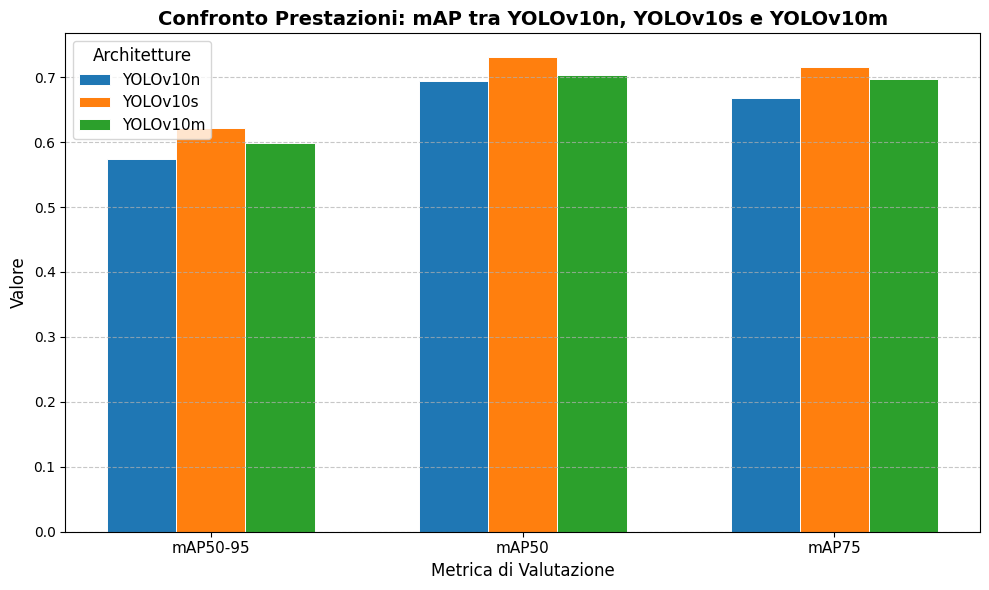

In [ ]:
modelli = ['YOLOv10n', 'YOLOv10s', 'YOLOv10m']
metriche = ['mAP50-95', 'mAP50', 'mAP75']

valori = np.array([
    [test_resultsN.box.map,   test_resultsS.box.map,   test_resultsM.box.map],     
    [test_resultsN.box.map50, test_resultsS.box.map50, test_resultsM.box.map50],   
    [test_resultsN.box.map75, test_resultsS.box.map75, test_resultsM.box.map75]    
])

n_metriche = len(metriche)
n_modelli = len(modelli)
larghezza_barra = 0.2
spazio_tra_gruppi = 0.3
posizioni_base = np.arange(n_metriche) * (n_modelli * larghezza_barra + spazio_tra_gruppi)

fig, ax = plt.subplots(figsize=(10, 6))

for idx_modello, nome_modello in enumerate(modelli):
    offset = idx_modello * larghezza_barra
    ax.bar(
        posizioni_base + offset,
        valori[:, idx_modello],
        larghezza_barra,
        label=nome_modello,
        edgecolor='white',
        linewidth=0.7
    )

ax.set_xlabel('Metrica di Valutazione', fontsize=12)
ax.set_ylabel('Valore', fontsize=12)
ax.set_title('Confronto Prestazioni: mAP tra YOLOv10n, YOLOv10s e YOLOv10m', fontsize=14, fontweight='bold')
ax.set_xticks(posizioni_base + (n_modelli - 1) * larghezza_barra / 2)
ax.set_xticklabels(metriche, fontsize=11)
ax.legend(title="Architetture", fontsize=11, title_fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
plt.close()

# **Confronto grafico Precision, Recall e F1**

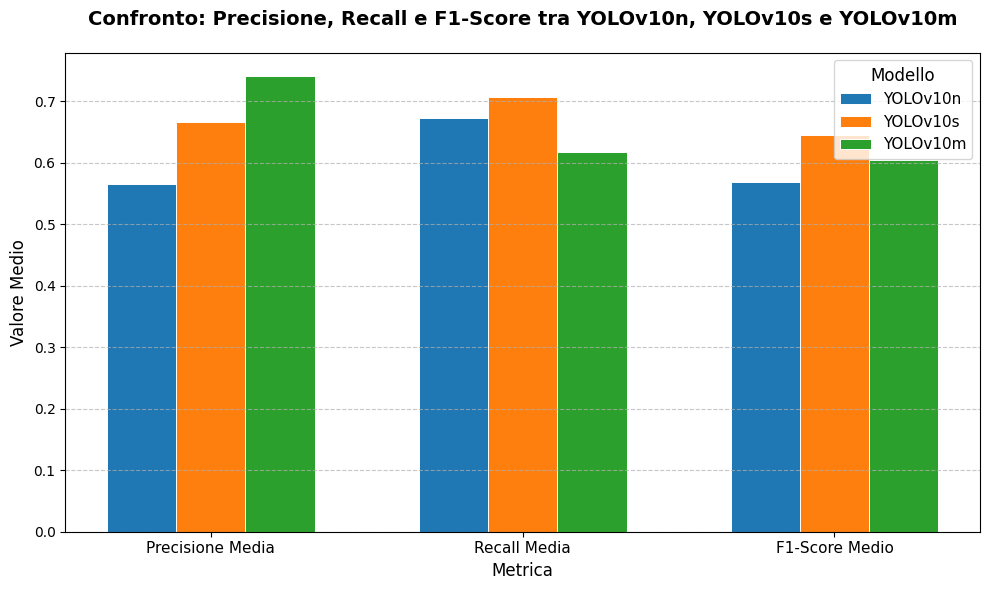

In [ ]:
modelli = ['YOLOv10n', 'YOLOv10s', 'YOLOv10m']
metriche = ['Precisione Media', 'Recall Media', 'F1-Score Medio']

valori = np.array([
    [np.mean(test_resultsN.box.p),  np.mean(test_resultsS.box.p),  np.mean(test_resultsM.box.p)],   
    [np.mean(test_resultsN.box.r),  np.mean(test_resultsS.box.r),  np.mean(test_resultsM.box.r)],   
    [np.mean(test_resultsN.box.f1), np.mean(test_resultsS.box.f1), np.mean(test_resultsM.box.f1)]   
])

n_metriche = len(metriche)
n_modelli = len(modelli)
larghezza_barra = 0.2
spazio_tra_gruppi = 0.3
posizioni_base = np.arange(n_metriche) * (n_modelli * larghezza_barra + spazio_tra_gruppi)

fig, ax = plt.subplots(figsize=(10, 6))

for idx, modello in enumerate(modelli):
    offset = idx * larghezza_barra
    ax.bar(
        posizioni_base + offset,
        valori[:, idx],
        larghezza_barra,
        label=modello,
        edgecolor='white',
        linewidth=0.7
    )

ax.set_xlabel('Metrica', fontsize=12)
ax.set_ylabel('Valore Medio', fontsize=12)
ax.set_title('Confronto: Precisione, Recall e F1-Score tra YOLOv10n, YOLOv10s e YOLOv10m',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(posizioni_base + (n_modelli - 1) * larghezza_barra / 2)
ax.set_xticklabels(metriche, fontsize=11)
ax.legend(title="Modello", fontsize=11, title_fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
plt.close()

# **Testing**

Il codice seguente consente di eseguire il **testing pratico dei modelli addestrati**, utilizzando un set di immagini di segnali stradali **raccolte personalmente** durante la fase di realizzazione del progetto. Queste immagini, scattate in contesti reali e con condizioni variabili (angolazioni, illuminazione, distanza, ecc.), sono state selezionate appositamente per valutare le performance del modello in scenari il più possibile vicini a quelli d’uso reale, come descritto in dettaglio nella relazione tecnica allegata. L’obiettivo è verificare non solo la precisione del rilevamento, ma anche la robustezza del sistema di fronte a situazioni non perfettamente controllate.


image 1/1 /content/images/image.jpeg: 640x480 1 forb_overtake, 1 forb_speed_over_40, 176.1ms
Speed: 5.8ms preprocess, 176.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


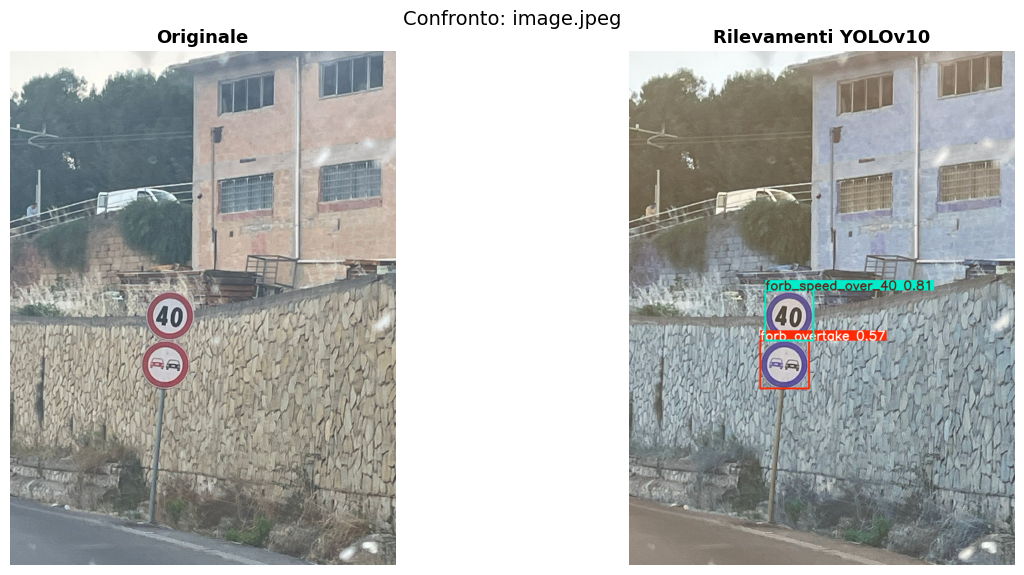


image 1/1 /content/images/image2.jpeg: 640x480 1 forb_speed_over_40, 1 info_crosswalk, 1 warn_crosswalk, 12.6ms
Speed: 3.0ms preprocess, 12.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


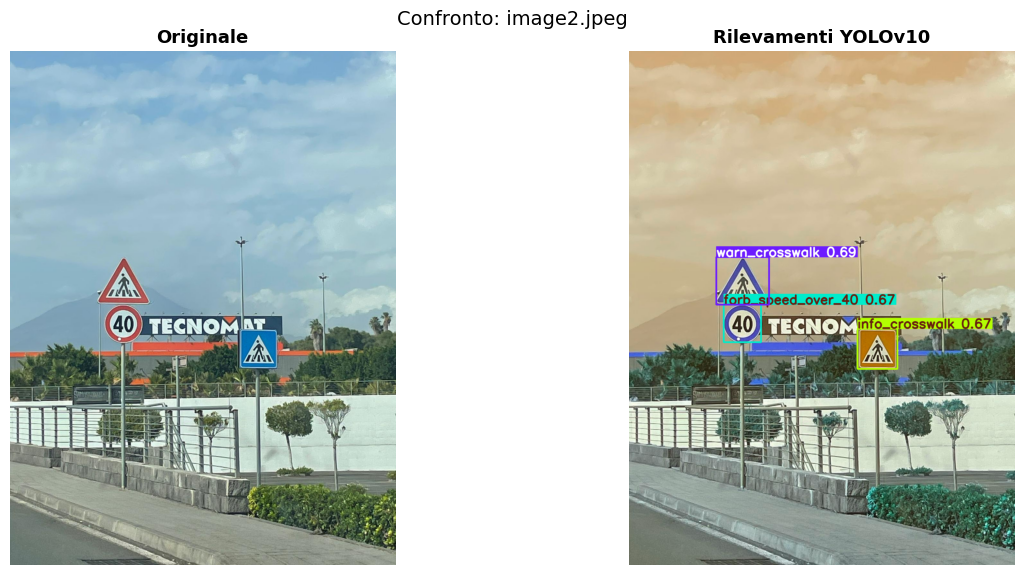

In [ ]:
#Modificare il commento sulla base del modello che si vuole testare
model = YOLO("./content/runs/detect/train/weights/best.pt")
#model = YOLO("./content/runs/detect/train2/weights/best.pt")
#model = YOLO(."/content/runs/detect/train3/weights/best.pt")

image_paths = [
    "images/image.jpeg",
    "images/image2.jpeg",
]

for img_path in image_paths:
    img_original = cv2.imread(img_path)
    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

    results = model(img_path)

    for r in results:
        img_with_boxes = r.plot()

        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        axes[0].imshow(img_original_rgb)
        axes[0].set_title("Originale", fontsize=13, fontweight='bold')
        axes[0].axis('off')

        axes[1].imshow(img_with_boxes)
        axes[1].set_title("Rilevamenti YOLOv10", fontsize=13, fontweight='bold')
        axes[1].axis('off')

        plt.suptitle(f"Confronto: {img_path.split('/')[-1]}", fontsize=14, y=0.95)
        plt.tight_layout()
        plt.show()